In [58]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.tools.plotting import parallel_coordinates
from sklearn.metrics import confusion_matrix #Confusion matrix
from sklearn.metrics import accuracy_score  
from sklearn.cross_validation import train_test_split
from scipy import optimize as op

from subprocess import check_output
print(check_output(["ls", "./data"]).decode("utf8"))

# Any results you write to the current directory are saved as output.


iris.csv



In [48]:
iris = pd.read_csv("./data/iris.csv") #load the dataset
iris.info()
iris.head(2) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa


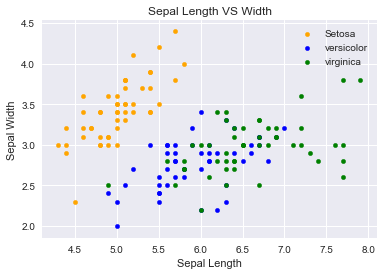

In [49]:
%matplotlib inline

fig = iris[iris.Species=='Setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.
In [7]:

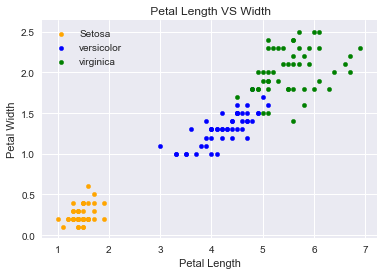

In [50]:
fig = iris[iris.Species=='Setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
iris[iris.Species=='Versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
iris[iris.Species=='Virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
plt.show()


As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better accuracy over the Sepal. We will check that later.

<b>Now let us see how are the length and width are distributed</b>

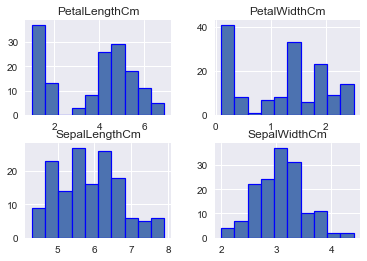

In [51]:
plt.figure(figsize=(15,8))
iris.hist(edgecolor='blue', linewidth=1.2)
plt.show()

<b>Now let us see how the length and width vary according to the species</b>

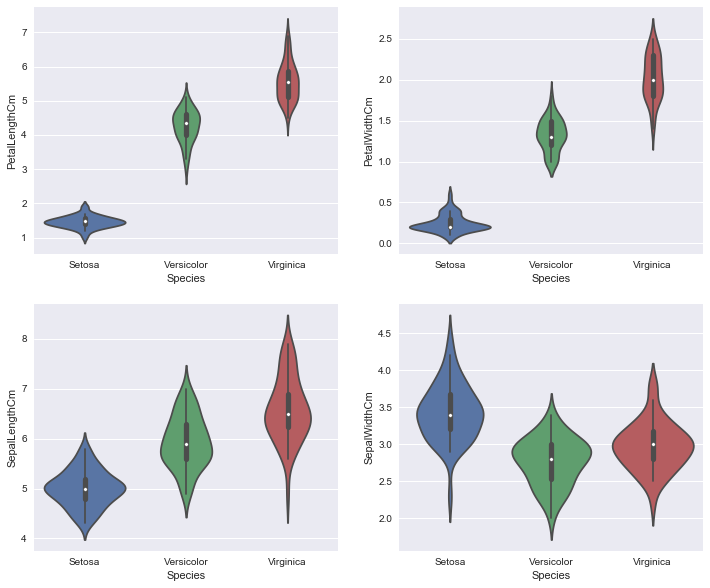

In [52]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
sb.violinplot(x='Species',y='PetalLengthCm',data=iris)
plt.subplot(2,2,2)
sb.violinplot(x='Species',y='PetalWidthCm',data=iris)
plt.subplot(2,2,3)
sb.violinplot(x='Species',y='SepalLengthCm',data=iris)
plt.subplot(2,2,4)
sb.violinplot(x='Species',y='SepalWidthCm',data=iris)



<b>Lets Go Logistics Regression</b>

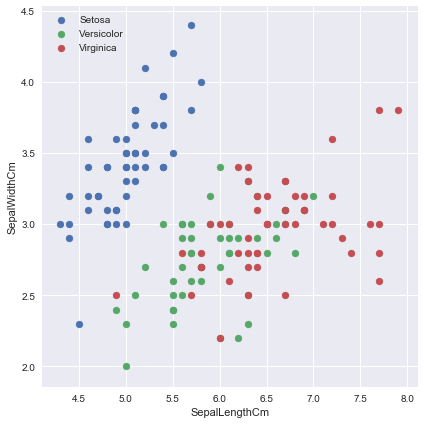

In [53]:
#Plot with respect to sepal length
sepalPlt = sb.FacetGrid(iris, hue="Species", size=6) \
   .map(plt.scatter, "SepalLengthCm", "SepalWidthCm")
plt.legend(loc='upper left')


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.parallel_coordinates' is deprecated, import 'pandas.plotting.parallel_coordinates' instead.
  


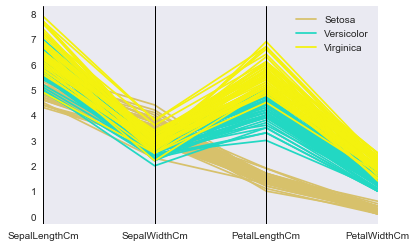

In [54]:
#Sepal and Petal lengths
parallel_coordinates(iris, "Species")

<h2>Regularized Cost function and gradient<h2/>
![alt text](http://i.imgur.com/id7nVp6.png "Title")
![alt text](http://i.imgur.com/7x8omie.png "Title")

In [55]:
#Data setup

Species = ['Setosa', 'Versicolor', 'Virginica']
#Number of examples
m = iris.shape[0]
#Features
n = 4
#Number of classes
k = 3

X = np.zeros((m,n + 1))
y = np.array((m,1))
X[:,1] = iris['PetalLengthCm'].values
X[:,2] = iris['PetalWidthCm'].values
X[:,3] = iris['SepalLengthCm'].values
X[:,4] = iris['SepalWidthCm'].values

#Labels
y = iris['Species'].values

#Mean normalization
for j in range(n):
    X[:, j] = (X[:, j] - X[:,j].mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)


In [56]:
#Logistic Regression

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

#Regularized cost function
def regCostFunction(theta, X, y, _lambda = 0.1):
    m = len(y)
    h = sigmoid(X.dot(theta))
    tmp = np.copy(theta)
    tmp[0] = 0 
    reg = (_lambda/(2*m)) * np.sum(tmp**2)

    return (1 / m) * (-y.T.dot(np.log(h)) - (1 - y).T.dot(np.log(1 - h))) + reg

#Regularized gradient function
def regGradient(theta, X, y, _lambda = 0.1):
    m, n = X.shape
    theta = theta.reshape((n, 1))
    y = y.reshape((m, 1))
    h = sigmoid(X.dot(theta))
    tmp = np.copy(theta)
    tmp[0] = 0
    reg = _lambda*tmp /m

    return ((1 / m) * X.T.dot(h - y)) + reg

#Optimal theta 
def logisticRegression(X, y, theta):
    result = op.minimize(fun = regCostFunction, x0 = theta, args = (X, y),
                         method = 'TNC', jac = regGradient)
    
    return result.x


In [97]:
#Training

all_theta = np.zeros((k, n + 1))

#One vs all
i = 0
for flower in Species:
    #set the labels in 0 and 1
    tmp_y = np.array(y_train == flower, dtype = int)
    #print(tmp_y)
    optTheta = logisticRegression(X_train, tmp_y, np.zeros((n + 1,1)))
    all_theta[i] = optTheta
    i += 1

In [93]:
#Predictions
# print("all_theta")
# print(all_theta)
# print("all_theta.T")
# print(all_theta.T)
# print("X_test")
# print(X_test)
# print("X_test.dot(all_theta.T)")
#print(X_test.dot(all_theta.T))
P = sigmoid(X_test.dot(all_theta.T)) #probability for each flower
# print("P[1, :]")
# print(P[1, :])
p = [Species[np.argmax(P[i, :])] for i in range(X_test.shape[0])]
print(p)
print("Test Accuracy ", accuracy_score(y_test, p) * 100 , '%')

['Virginica', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica', 'Setosa', 'Virginica', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Setosa', 'Setosa', 'Versicolor', 'Setosa', 'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Versicolor']
Test Accuracy  96.6666666667 %


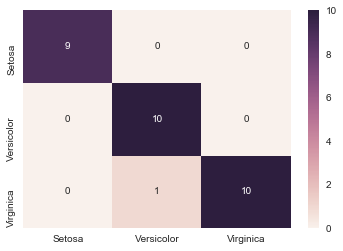

In [61]:
#Confusion Matrix
cfm = confusion_matrix(y_test, p, labels = Species)

sb.heatmap(cfm, annot = True, xticklabels = Species, yticklabels = Species)